In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline
from tqdm import tqdm
from multitest import MultiTest


In [2]:
from scipy.interpolate import interp1d
import pandas as pd

In [3]:
import numpy as np
import torch
import os
#from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM, GPT2LMHeadModel

In [32]:
import numpy as np
import pandas as pd
from multitest import MultiTest
from tqdm import tqdm
import torch
import logging
import spacy
nlp = spacy.load("en_core_web_sm")

def break_text(text):
    return [str(s) for s in nlp(text).sents]

text = """
AFTER an unequivocal experience of the inefficacy of the subsisting
federal government, you are called upon to deliberate on a new
Constitution for the United States of America. The subject speaks its
own importance; comprehending in its consequences nothing less than the
existence of the UNION, the safety and welfare of the parts of which it
is composed, the fate of an empire in many respects the most interesting
in the world. It has been frequently remarked that it seems to have been
reserved to the people of this country, by their conduct and example,
to decide the important question, whether societies of men are really
capable or not of establishing good government from reflection and
choice, or whether they are forever destined to depend for their
political constitutions on accident and force. If there be any truth
in the remark, the crisis at which we are arrived may with propriety be
regarded as the era in which that decision is to be made; and a wrong
election of the part we shall act may, in this view, deserve to be
considered as the general misfortune of mankind.

This idea will add the inducements of philanthropy to those of
patriotism, to heighten the solicitude which all considerate and good
men must feel for the event. Happy will it be if our choice should be
directed by a judicious estimate of our true interests, unperplexed and
unbiased by considerations not connected with the public good. But this
is a thing more ardently to be wished than seriously to be expected. The
plan offered to our deliberations affects too many particular interests,
innovates upon too many local institutions, not to involve in its
discussion a variety of objects foreign to its merits, and of views,
passions and prejudices little favorable to the discovery of truth.

Among the most formidable of the obstacles which the new Constitution
will have to encounter may readily be distinguished the obvious interest
of a certain class of men in every State to resist all changes which
may hazard a diminution of the power, emolument, and consequence of
the offices they hold under the State establishments; and the perverted
ambition of another class of men, who will either hope to aggrandize
themselves by the confusions of their country, or will flatter
themselves with fairer prospects of elevation from the subdivision of
the empire into several partial confederacies than from its union under
one government.
"""

doc = nlp(text)

In [44]:
str(sent.sent)

'themselves with fairer prospects of elevation from the subdivision of\nthe empire into several partial confederacies than from its union under\none government.\n'

In [38]:
dir(sent)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'li

In [36]:
for sent in doc:
    print(sent)



AFTER
an
unequivocal
experience
of
the
inefficacy
of
the
subsisting


federal
government
,
you
are
called
upon
to
deliberate
on
a
new


Constitution
for
the
United
States
of
America
.
The
subject
speaks
its


own
importance
;
comprehending
in
its
consequences
nothing
less
than
the


existence
of
the
UNION
,
the
safety
and
welfare
of
the
parts
of
which
it


is
composed
,
the
fate
of
an
empire
in
many
respects
the
most
interesting


in
the
world
.
It
has
been
frequently
remarked
that
it
seems
to
have
been


reserved
to
the
people
of
this
country
,
by
their
conduct
and
example
,


to
decide
the
important
question
,
whether
societies
of
men
are
really


capable
or
not
of
establishing
good
government
from
reflection
and


choice
,
or
whether
they
are
forever
destined
to
depend
for
their


political
constitutions
on
accident
and
force
.
If
there
be
any
truth


in
the
remark
,
the
crisis
at
which
we
are
arrived
may
with
propriety
be


regarded
as
the
era
in
which
that
decision
is
to
be
made

In [30]:
dir(d)

['_',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_fix_dep_copy',
 '_recalculate_indices',
 '_vector',
 '_vector_norm',
 'as_doc',
 'char_span',
 'conjuncts',
 'doc',
 'end',
 'end_char',
 'ent_id',
 'ent_id_',
 'ents',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'kb_id',
 'kb_id_',
 'label',
 'label_',
 'lefts',
 'lemma_',
 'lower_',
 'merge',
 'n_lefts',
 'n_rights',
 'noun_chunks',
 'orth_',
 'remove_extension',
 'rights',
 'root',
 'sent',
 'sentiment',
 'set_extension',
 'similarity',
 'start',
 'start_char',
 'string',
 'subtree',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'upper_',
 'vector',
 'vector_norm'

In [27]:
for d in doc.sents:
    print(d)
    print('+')
    print('length = ', len(d))


AFTER an unequivocal experience of the inefficacy of the subsisting
federal government, you are called upon to deliberate on a new
Constitution for the United States of America.
+
length =  33
The subject speaks its
own importance; comprehending in its consequences nothing less than the
existence of the UNION, the safety and welfare of the parts of which it
is composed, the fate of an empire in many respects the most interesting
in the world.
+
length =  52
It has been frequently remarked that it seems to have been
reserved to the people of this country, by their conduct and example,
to decide the important question, whether societies of men are really
capable or not of establishing good government from reflection and
choice, or whether they are forever destined to depend for their
political constitutions on accident and force.
+
length =  71
If there be any truth
in the remark, the crisis at which we are arrived may with propriety be
regarded as the era in which that decision is to b

In [5]:
for w in .sents:
    print(w)
text = """Finally, educating nursing students about academic integrity and the value of gaining knowledge and skills from focused in-depth reading, critical thinking, and scientific writing is of upmost importance as these can be applied in professional practice throughout a nurse’s career to improve patient care and the delivery of health services."""


# Process


### At Training
 - Decide on a model + context (or a proxy model)
 - Get data generated by the model with the relevant context
 - Evaluate log-perplexity of the data wrt to the model and the context
 - Interpolate to get an estimated survival function
 
### At inference:
 - Classifier: model, survival function, log-perplixity function (matched context policy)
 - Input: test text
 - Outputs: HC score, Fisher score, sentences
 - Reject if HC score or Fisher are large.

### What can we say:
- Test whether a document was written by a model against an alternative: "some edits"
- If we detect some edits, indicate which ones are they likely to be. We can then examine the text and apply the detecotr to larger chunks (e.g., to verify that the non-selected parts were indeed AI-generated). 
- Determine maximal number of edits so that the text is indetectable from "AI model generated"
- Determine minimal number of edits needed so that the text cannot be reliably labaled as "entirely AI-generated" (becasue there exists)
- Determine the number of sentences needed to distinguish between AI-generated and AI-generated with some edits. 


# Logloss

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from text_detect import PerplexityEvaluator

In [1]:
lm_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(lm_name)
model = AutoModelForCausalLM.from_pretrained(lm_name)

device = 'mps' if torch.backends.mps.is_available() else 'cpu'
model.to(device)

sentence_detector = PerplexityEvaluator(model, tokenizer)

In [ ]:
text = """Finally, educating nursing students about academic integrity and the value of gaining knowledge and skills from focused in-depth reading, critical thinking, and scientific writing is of upmost importance as these can be applied in professional practice throughout a nurse’s career to improve patient care and the delivery of health services."""



# Analyze Data

In [10]:
data = pd.read_csv("~/Google Drive/Data/gpt_wiki.csv")[['gpt', 'wiki']]

In [4]:
data_gpt = pd.read_csv("results/gpt_sent_perp_0.csv")

In [6]:
from glob import glob

def read_all_csv_files(pattern):
    df = pd.DataFrame()
    for f in glob(pattern):
        df = pd.concat([df, pd.read_csv(f)])
    return df

In [7]:
data_wiki = read_all_csv_files("results/wiki_sent_perp_*.csv")
data_gpt = read_all_csv_files("results/gpt_sent_perp_*.csv")
print(data_wiki.shape)
print(data_gpt.shape)

(474514, 5)
(654773, 5)


In [8]:
data_wiki['author'] = 'wiki'
data_gpt['author'] = 'gpt'

In [9]:
datam = pd.concat([data_gpt, data_wiki])

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_true=datam.author, y_score=datam.logloss, pos_label='wiki')

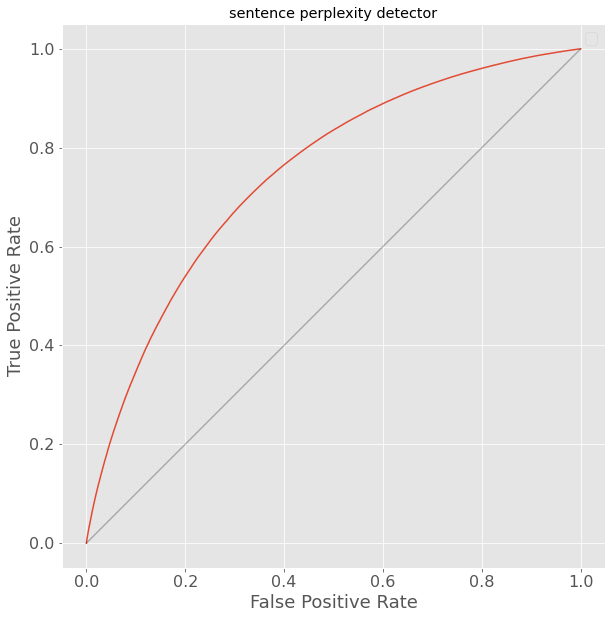

In [125]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot(label='logloss')
plt.plot([0, 1], [0, 1], "k", alpha=.25)
plt.axis("square")
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
fig = plt.gcf()
fig.set_size_inches(10, 10, forward=True)
plt.legend([],fontsize=16)
plt.title("sentence perplexity detector")
plt.savefig("ROC_sentences.png")
plt.show()

In [139]:
kurt = lambda x : scipy.stats.kurtosis(x)
agg_stats = datam.groupby('author').logloss.agg(['mean','median', 'std', 'skew', kurt])
agg_stats

,mean,median,std,skew,<lambda_0>
author,,,,,
gpt,3.530244,3.452712,0.758076,0.69616,1.202960
wiki,4.257753,4.191270,0.856725,0.60649,1.218302


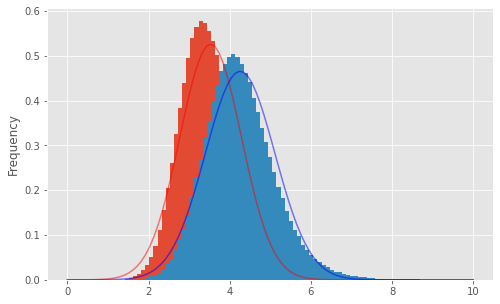

In [127]:
from scipy.stats import norm
tt = np.linspace(0,10,100)
datam.groupby('author').logloss.plot.hist(bins = tt, density=True)
plt.plot(tt, norm.pdf(tt, loc=agg_stats.loc['gpt','mean'], scale=agg_stats.loc['gpt','std']), 'r', alpha=0.5)
plt.plot(tt, norm.pdf(tt, loc=agg_stats.loc['wiki','mean'], scale=agg_stats.loc['wiki','std']), 'b',  alpha=0.5)
plt.show()

## Under noraml approximation:
$$
Z_1 \sim N(\mu_1, \sigma^2),\quad Z_2 \sim N(\mu_2, \sigma^2)
$$
$$
Z = \frac{Z_1 - Z_2}{\sqrt{2}\sigma} \sim N(\mu_1 - \mu_2 , 1) 
$$


In [109]:
m1, m2 = datam.groupby('author').logloss.mean()
s1, s2 = datam.groupby('author').logloss.std()
s = (s1 + s2) / 2
m = (m2 - m1) / s / np.sqrt(2)
m

0.63722705594959

In [40]:
n = 10000
r = m**2 / 2 / n

def rho_inv(r):
    if r > 1: return np.nan
    return (r + 1/2) * (r < .25) + (1 - (1 - np.sqrt(r))**2) * (r >= 0.25) 

beta = rho_inv(r)
k = n ** (1-beta)
print("~ num of edits needed: ", k)

~ num of edits needed:  99.98139079989893


In [46]:
def fit_pval_func(xx, G = 501):
    qq = np.linspace(0, 1, G)
    yy = [np.quantile(xx, q) for q in qq]
    return interp1d(yy, 1-qq, fill_value = (1,0), bounds_error=False)

In [62]:
pval_func = {}
for c in data_gpt.groupby(['length']):
    pval_func[c[0]] = fit_pval_func(c[1].logloss)

In [39]:
def pval_per_sentence(texts, model, tokenizer, pval_func):
    pvals = []
    for text in texts:
        x = logloss(model, tokenizer, text)
        pval = pval_func()
        pvals.append(pval) 
    return pvals

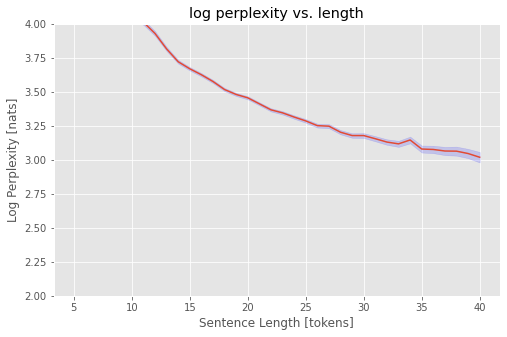

In [77]:
def plot_perp_vs_len(data, min_len=5, max_len=40):
    df_grouped = (
        data[['length', 'logloss']][(data['length'] >= min_len) 
                                        & (data['length'] <= max_len)
                                       ].groupby(['length']).agg(['mean', 'std', 'count'])
    )
    df_grouped = df_grouped.droplevel(axis=1, level=0).reset_index()
    # Calculate a confidence interval as well.
    df_grouped['ci'] = 1.96 * df_grouped['std'] / np.sqrt(df_grouped['count'])
    df_grouped['ci_lower'] = df_grouped['mean'] - df_grouped['ci']
    df_grouped['ci_upper'] = df_grouped['mean'] + df_grouped['ci']
    df_grouped.head()


    fig, ax = plt.subplots()
    x = df_grouped['length']
    ax.plot(x, df_grouped['mean'])
    ax.fill_between(
        x, df_grouped['ci_lower'], df_grouped['ci_upper'], color='b', alpha=.15)
    ax.set_ylim(ymin=0)
    ax.set_title('log perplexity vs. length')
    ax.set_xlabel("Sentence Length [tokens]")
    ax.set_ylabel("Log Perplexity [nats]")
    ax.set_ylim((2,4))
    plt.rcParams["figure.figsize"] = (8,5)
    

plot_perp_vs_len(data_gpt, min_len=5, max_len=40)
plt.savefig("logperp_vs_len_gpt.png")
plt.show()

length
5     Axes(0.125,0.125;0.775x0.755)
10    Axes(0.125,0.125;0.775x0.755)
20    Axes(0.125,0.125;0.775x0.755)
Name: logloss, dtype: object

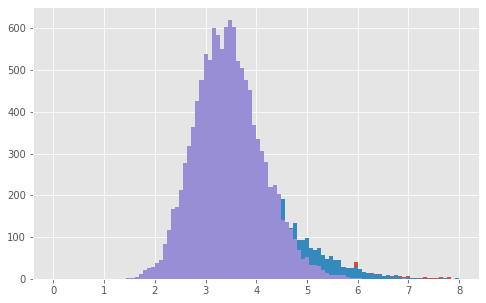

In [90]:
data_gpt[data_gpt.length.isin([5, 10, 20])].groupby('length').logloss.hist(bins=np.linspace(0,8,101))